### 0. Information

In this notebook I test my previously trained model, and calculate it outputs Signal Similarity (SSIM) and Peak Signal to Noise Ratio (PSNR)

### 1. Loading and preparing image for testing

In [2]:
import cv2

# reading initial image
image = cv2.imread("testimages/lena_color.jpg")
image.shape

(512, 512, 3)

In [3]:
# creating a downscaled version
image_downscaled = cv2.resize(image, (256, 256))
image.shape, image_downscaled.shape

((512, 512, 3), (256, 256, 3))

### 2. Loading model

In [4]:
import torch
from models.unet_inspired_model import UnetUpscaler

model = UnetUpscaler()
state_dict = torch.load("models/unet_inspired_model.pt", map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
model


UnetUpscaler(
  (layers): Sequential(
    (0): UpsamplingNearest2d(scale_factor=2.0, mode='nearest')
    (1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4), dilation=(2, 2))
    (2): LeakyReLU(negative_slope=0.01)
    (3): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4), dilation=(2, 2))
    (4): LeakyReLU(negative_slope=0.01)
    (5): Conv2d(64, 256, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4), dilation=(2, 2))
    (6): LeakyReLU(negative_slope=0.01)
    (7): Conv2d(256, 64, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4), dilation=(2, 2))
    (8): LeakyReLU(negative_slope=0.01)
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): LeakyReLU(negative_slope=0.01)
    (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): LeakyReLU(negative_slope=0.01)
    (13): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): LeakyReLU(negative_slope=0.01)
    (15): Conv2d(64,

### 3. Upscaling image

In [5]:
input_tensor = torch.from_numpy(image_downscaled)
input_tensor = input_tensor.permute(2,0,1)
input_tensor = input_tensor.unsqueeze(0)
input_tensor = input_tensor.to(torch.float32)
input_tensor = input_tensor / 255.0
input_tensor.shape, input_tensor

(torch.Size([1, 3, 256, 256]),
 tensor([[[[0.4627, 0.4980, 0.4471,  ..., 0.4745, 0.4706, 0.3804],
           [0.4706, 0.4902, 0.4549,  ..., 0.4706, 0.4627, 0.3804],
           [0.4745, 0.4588, 0.4588,  ..., 0.4471, 0.4353, 0.3255],
           ...,
           [0.2275, 0.2157, 0.2471,  ..., 0.2745, 0.2863, 0.2706],
           [0.2118, 0.2235, 0.2275,  ..., 0.2941, 0.2980, 0.2863],
           [0.2235, 0.3098, 0.2314,  ..., 0.3020, 0.2902, 0.2980]],
 
          [[0.5176, 0.5373, 0.5059,  ..., 0.5686, 0.5686, 0.4235],
           [0.5216, 0.5333, 0.5098,  ..., 0.5765, 0.5765, 0.4196],
           [0.5255, 0.5176, 0.5137,  ..., 0.5020, 0.4745, 0.3255],
           ...,
           [0.0902, 0.0706, 0.0980,  ..., 0.1922, 0.2235, 0.2235],
           [0.0667, 0.0745, 0.0784,  ..., 0.2275, 0.2471, 0.2431],
           [0.0667, 0.1529, 0.0784,  ..., 0.2549, 0.2588, 0.2667]],
 
          [[0.8745, 0.8745, 0.8706,  ..., 0.8784, 0.8902, 0.8078],
           [0.8667, 0.8706, 0.8627,  ..., 0.8627, 0.8784, 0.

In [6]:
output_tensor = model(input_tensor)

output_tensor = (output_tensor * 255).clamp(0, 255)
output_tensor = output_tensor.to(torch.uint8)



In [7]:
output_tensor = output_tensor.squeeze().permute(1, 2, 0)
output_tensor.shape

torch.Size([512, 512, 3])

In [8]:
image_upscaled = output_tensor.detach().numpy()
image_upscaled.shape

(512, 512, 3)

### 4. Displaying Images

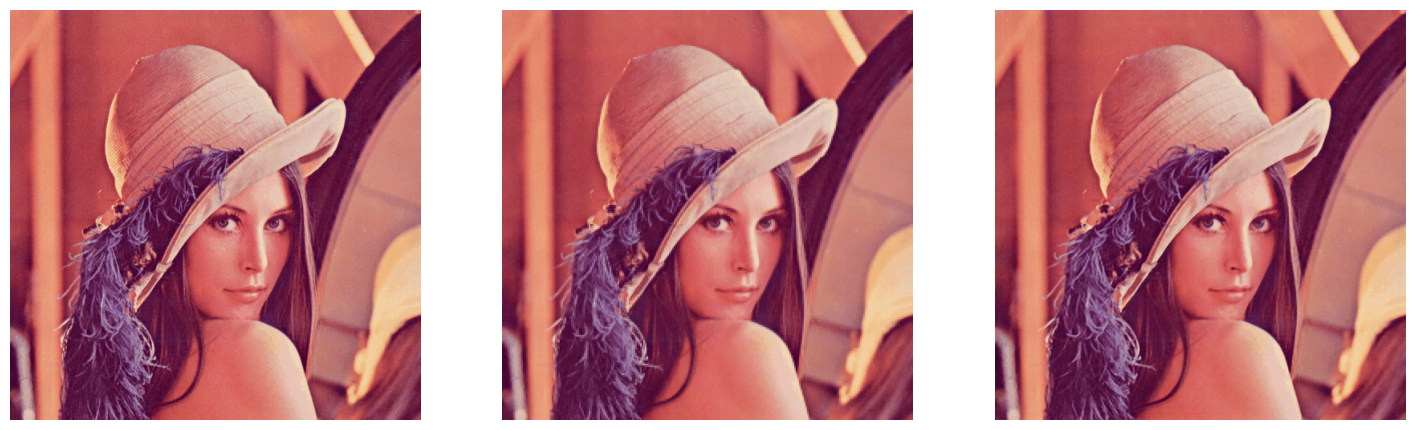

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(image[... , ::-1])
plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(image_downscaled[... , ::-1])
plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(image_upscaled[... , ::-1])
plt.show()


### 5. Using interpolation upscaling methods for comparison

In [11]:
input = image_downscaled
new_size = (512, 512)

nearest = cv2.resize(input, new_size, interpolation=cv2.INTER_NEAREST)
linear = cv2.resize(input, new_size, interpolation=cv2.INTER_LINEAR)
cubic = cv2.resize(input, new_size, interpolation=cv2.INTER_CUBIC)
lanczos = cv2.resize(input, new_size, interpolation=cv2.INTER_LANCZOS4)

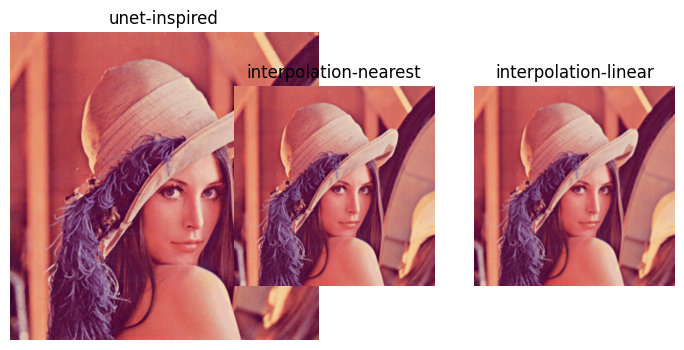

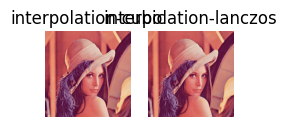

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,5,1)
plt.title("unet-inspired")
plt.axis("off")
plt.imshow(image_upscaled[... , ::-1])
plt.subplot(1,5,2)
plt.title("interpolation-nearest")
plt.axis("off")
plt.imshow(nearest[... , ::-1])
plt.subplot(1,5,3)
plt.title("interpolation-linear")
plt.axis("off")
plt.imshow(linear[... , ::-1])
plt.show()
plt.subplot(1,5,4)
plt.title("interpolation-cubic")
plt.axis("off")
plt.imshow(cubic[... , ::-1])
plt.subplot(1,5,5)
plt.title("interpolation-lanczos")
plt.axis("off")
plt.imshow(lanczos[... , ::-1])
plt.show()